# Gradient of Image

## import library

In [303]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [304]:
I0 = img.imread('test.jpeg')
print(type(I0))

<class 'numpy.ndarray'>


## check the size of the input image

In [305]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


In [306]:
I = np.mean(I0,axis=2)

## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [307]:
map1 = I0[:,:,0].astype('float64')
map2 = I0[:,:,1].astype('float64')
map3 = I0[:,:,2].astype('float64')




In [308]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#    
    
num_row     = I.shape[0]
num_column  = I.shape[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [309]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = (I-I.min()) / (I.max() - I.min())


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [310]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    temp = np.zeros(I.shape)

    for i in range(len(I)-1):
        temp[i,:] = I[i+1,:]
    temp[-1,:] = I[-1,:]

    D = I-temp 
    return D

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [311]:
def compute_derivative_x_backward(I):
    

    dd = np.zeros(I.shape)
    D = np.zeros(I.shape)

    for i in range(1,len(I)):
        dd[i,:] = I[i-1,:]
    dd[0,:] = I[0,:]
    
    D = I-dd 
    return D

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [312]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    tmp = np.zeros([I.shape[0]+2,I.shape[1]])

    tmp[0] = I[0,:]
    tmp[-1] = I[-1,:]

    for i in range(len(I)):
        tmp[i+1] = I[i,:]
    
    for i in range(1,len(tmp)-1):
        D[i-1] = (tmp[i+1,:]-tmp[i-1,:])/2

    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [313]:
def compute_derivative_y_forward(I):
    D = np.zeros(I.shape)

    bb = np.zeros([I.shape[0],I.shape[1]+1])

    bb[:,-1] = I[:,-1]
    bb[:,0:-1] = I[:,:]

    partial1 = bb[:,0:-1]
    partial2 = bb[:,1:]

    D = partial2 - partial1
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [314]:
def compute_derivative_y_backward(I):
    D = np.zeros(I.shape)

    bb = np.zeros([I.shape[0],I.shape[1]+1])
    bb[:,0] = I[:,0]
    bb[:,1:]=I 

    partial1 = bb[:,:-1]
    partial2 = bb[:,1:]

    D = partial2 - partial1

    

   
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [315]:
def compute_derivative_y_central(I):
    
    bb = np.zeros([I.shape[0],I.shape[1]+2])
    bb[:,1:-1]=I
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    bb[:0]=bb[:1]
    bb[:,-1]=bb[:,-2]    
    
    D = [] 
    for i in range(len(bb)):
        tmp = []
        for j in range(len(bb[i])-2):
            tmp.append((bb[i][j+2]-bb[i][j])/2)
        D.append(tmp)
    D = np.array(D)    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [335]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    norm1 = compute_derivative_x_central(I)
    norm2 = compute_derivative_y_central(I)


    norm_gradient = np.square(norm1)+np.square(norm2)
    norm_gradient = np.sqrt(norm_gradient)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

___

## functions for presenting the results

___

___

In [336]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [337]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [338]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [339]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [340]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [341]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [342]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [343]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [344]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [345]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [346]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [347]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [348]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [349]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [350]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [351]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [352]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


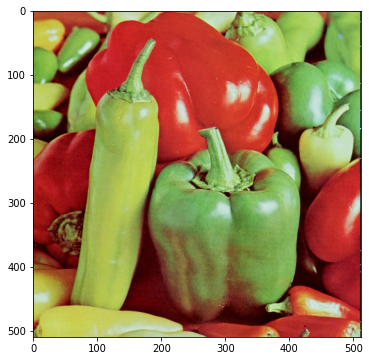

**************************************************
## [RESULT 02]
**************************************************


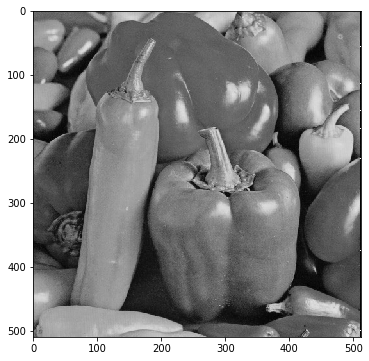

**************************************************
## [RESULT 03]
**************************************************


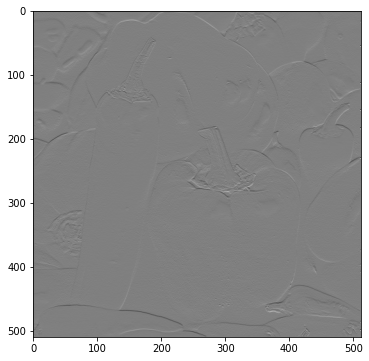

**************************************************
## [RESULT 04]
**************************************************


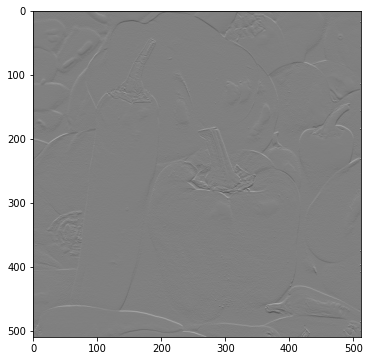

**************************************************
## [RESULT 05]
**************************************************


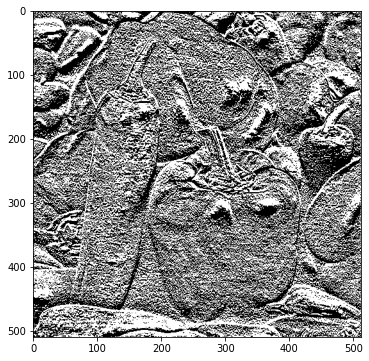

**************************************************
## [RESULT 06]
**************************************************


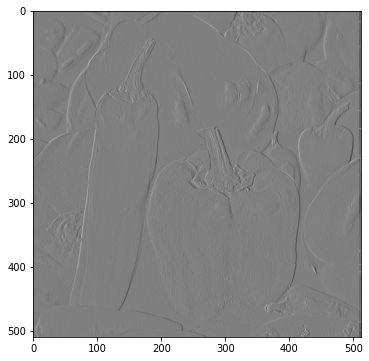

**************************************************
## [RESULT 07]
**************************************************


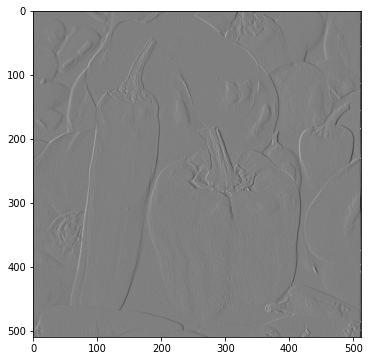

**************************************************
## [RESULT 08]
**************************************************


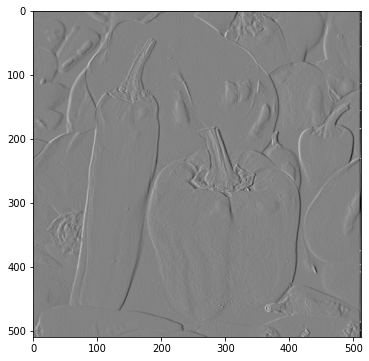

**************************************************
## [RESULT 09]
**************************************************


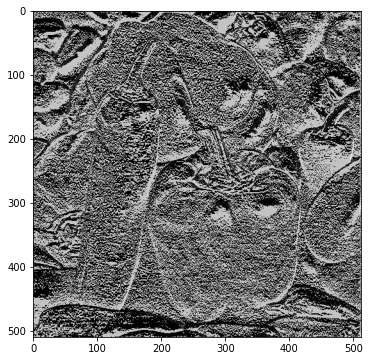

**************************************************
## [RESULT 10]
**************************************************


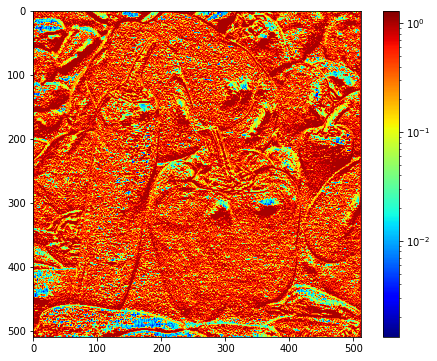

**************************************************
## [RESULT 11]
**************************************************
value1 =  0.007853403141361237
value2 =  0.0
value3 =  0.005235602094240843
value4 =  -0.011780104712041883
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.0
value2 =  0.0026178010471204186
value3 =  0.01570680628272253
value4 =  -0.013089005235602025
**************************************************
## [RESULT 13]
**************************************************
value1 =  -1.0
value2 =  0.0
value3 =  0.0
value4 =  -1.0
**************************************************
## [RESULT 14]
**************************************************
value1 =  -0.03534031413612565
value2 =  0.0
value3 =  -0.017015706806282727
value4 =  0.0
**************************************************
## [RESULT 15]
**************************************************
value1 =  0.0
value2 =  -0.6426701570680627
value3

In [353]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)